### Homework III 

Bayesian Modeling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Tasks

1. Plot the beta distribution in python for the following parameters: $(\alpha,\beta) = (1,1), (10,10), (100,100), (20,10)$
2. Assume a *uniform prior* for the initial estimate of the proportion of clicks on an ad. Your initial data collection yields 2 clicks for the first 100 impressions (displayed ads). Plot the corresponding posterior distribution.
3. Reproduce the following steps in http://varianceexplained.org/r/empirical_bayes_baseball/ (code below should help)
    * Step 1: Estimate a prior from all your data
    * Step 2: Use that distribution as a prior for each individual estimate
    * Step 3: Plot the "shrunk estimate" versus the "naive proportion"
    * Discuss which parameters determine the "amount of shrinkage" an estimate experiences.

In [2]:
from scipy.stats import beta

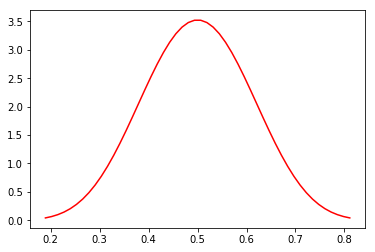

In [19]:
alpha0=10 
beta0=10
fig, ax = plt.subplots(1,1,figsize=(6,4))
x = np.linspace(beta.ppf(0.001, alpha0, beta0),
               beta.ppf(0.999, alpha0, beta0))
ax.plot(x, beta.pdf(x, alpha0, beta0), 'r-', label='beta pdf')
plt.show()

I created the baseball **batting** dataset from the R [Lahman](https://cran.r-project.org/web/packages/Lahman/index.html) package.

In [12]:
career = pd.read_csv('../Lessons/data/Batting.csv.gz')

In [6]:
career.head(10)

,name,H,AB,average
0,Hank Aaron,3771,12364,0.304998
1,Tommie Aaron,216,944,0.228814
2,Andy Abad,2,21,0.095238
3,John Abadie,11,49,0.224490
4,Ed Abbaticchio,772,3044,0.253614
5,Fred Abbott,107,513,0.208577
6,Jeff Abbott,157,596,0.263423
7,Kurt Abbott,523,2044,0.255871
8,Ody Abbott,13,70,0.185714
9,Frank Abercrombie,0,4,0.000000


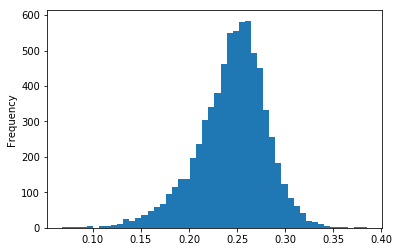

In [13]:
plt.figure()
career = career[career['AB']>=50]
career.average.plot.hist(bins=50)

In [14]:
alpha0, beta0, _, __ = beta.fit(career.average, floc=0, fscale=1) 

In [15]:
print('Alpha nought = ', alpha0)
print('Beta nought = ', beta0)

Alpha nought =  31.938005904395087
Beta nought =  98.75967890325411


 plot the beta prior along with my starting histogram

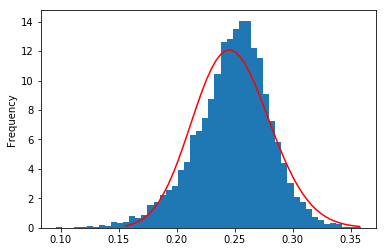

In [11]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
x = np.linspace(beta.ppf(0.001, alpha0, beta0),
               beta.ppf(0.999, alpha0, beta0))
ax.plot(x, beta.pdf(x, alpha0, beta0), 'r-', label='beta pdf')
career.average.plot.hist(bins=50, normed=True) #note: normed is deprecated, I must have an old version of matplotlib
plt.show()

In [16]:
#empirical Bayes estimate:
career['eb_estimate'] = (career.loc[:,'H'] + alpha0) / (career.loc[:,'AB'] + alpha0 + beta0)

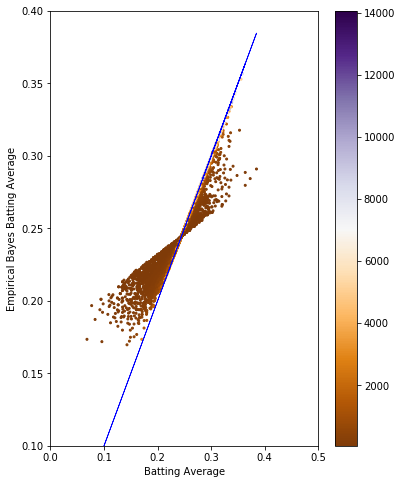

In [21]:
y = alpha0 / (alpha0+beta0)
fig, ax = plt.subplots(1,1,figsize=(6,8))
ax.set_xlabel('Batting Average')
ax.set_ylabel('Empirical Bayes Batting Average')
ax.set_xlim([0, 0.5])
ax.set_ylim([0.1, .4])
plt.axhline(y=y, color='b', linestyle='--')
plt.plot(career['average'], career['average'], 'b-', linewidth=0.8) #This plots a diagonal line of y=x, i.e. if they hit exactly to their career data. 
scat = plt.scatter(career['average'], career['eb_estimate'], c=career['AB'], cmap='PuOr', s=4)
#adding the colorbar
cbar = plt.colorbar(scat)
plt.show()